# Tesla Monthly Closing Price Prediction.

- Predict the monthly closing price for Tesla company stock based on 3 years of recorded data from Alpha Vantage API.  
##### ***note: Tesla stock is typically volatile, more than three times as volatile as the S&P 500 in recent months.***

# Goal

- Identify drivers of monthly closing price.
- Use drivers to develop a machine learning model to predict company stock market closing price value.

# Imports

In [1]:
# ignoring warning
import warnings
warnings.filterwarnings('ignore')

# custom import to bring in api_key and not display
import config
import acquire as a
import prepare as p
import wrangle as w
import explore as e
import model as m

# variable for API key access
api_key = config.ALPHA_VANTAGE_API_KEY

# Acquire

- Data acquired from Alpha Vantage API website | API Documentation Reference: https://www.alphavantage.co/documentation/#intelligence
- Data initially acquired on 03 Oct, 2023.
- It contained 36 rows and 5 columns before cleaning for each stock.
- Each row represents a month cycle for the company stock between 2020 and 2023.
- Each column represents an element of the company stock price (open, high, low, close, volume).

# Prepare

## Data Preprocessing Steps

###  **Column Renaming:**
   - Renamed columns to enhance readability.

### **Row Handling:**
   - All rows were retained.

### **Data Type Validation:**
   - Checked and ensured that column data types were appropriate.
   - Changed all columns from object to numerical.

### **Outlier Handling:**
   - Not very many outliers existed in this data.

### **Categorical Variable Encoding:**
   - Encoded categorical variables, including the creation of dummy variables where necessary.
   - Dropped as it was not helpful in feature space.

### **Data Splitting:**
   - Split the data into three sets for modeling: training, validation, and test, with an approximate split of 70/15/15.

### **Data Scaling:**
   - Scaled the data using Min-Max Scaling for modeling purposes.

In [2]:
# acquire, clean, and prepare the data
nvda_df, aapl_df, amd_df, tsla_df, vvos_df = w.wrangle_stock_data()

# Train, test, split data
tsla_train, tsla_val, tsla_test = p.train_val_test(tsla_df)

### Quick view of data,

In [3]:
# First 5 rows of data
print(tsla_train.shape)
tsla_train.head()

(25, 9)


,tsla_open,tsla_high,tsla_low,tsla_close,tsla_volume,month,day_of_week,year,next_month_close
2020-12-31,597.59,718.72,541.2100,705.67,1194948499,December,Thursday,2020,567.60
2023-10-04,244.81,261.86,242.6200,261.16,355517274,October,Wednesday,2023,250.22
2023-06-30,202.59,276.99,199.3700,261.77,3443091887,June,Friday,2023,203.93
2021-05-28,703.80,706.00,546.9800,625.22,625175872,May,Friday,2021,709.44
2022-07-29,681.00,894.96,648.5001,891.45,581783311,July,Friday,2022,673.42


### Distribution of TESLA (TSLA) stock Data based on close price

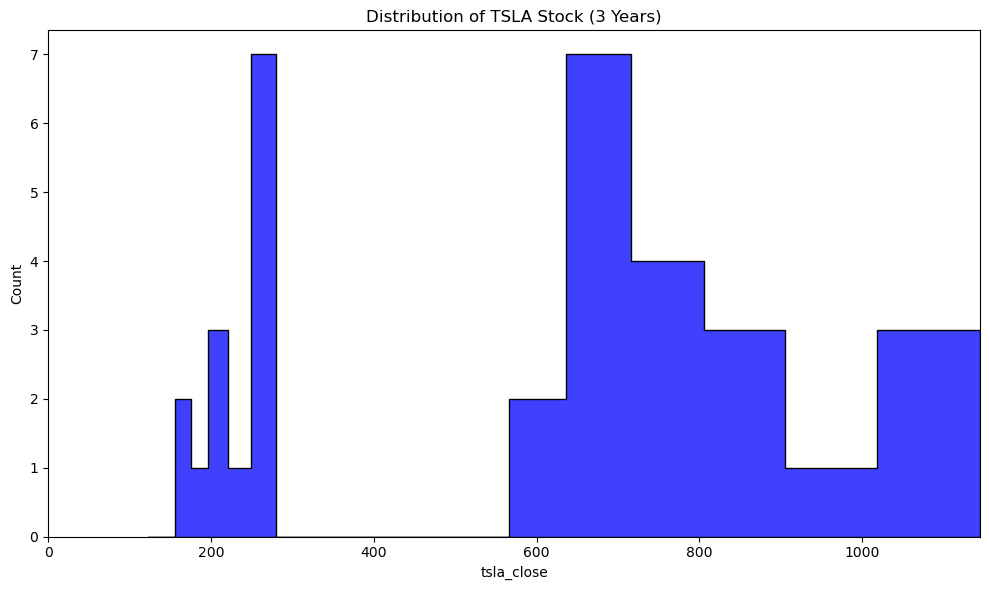

In [4]:
# function for data distribution based on target
e.dist_of_data(tsla_df, 'tsla_close')

# Explore

* Does TSLA stock volume have a correlation with it's daily closing price? 
* Is there a significant relationship between the month in which TSLA stock was traded and its closing price?
* Does TSLA daily high stock price have a correlation with open stock price?  
* Is there a significant correlation between the month in which TSLA stock was traded and its closing price? 

## Question 1

### Does TSLA stock volume have a correlation with it's daily closing price?  


> **Null Hypothesis ($H0$):** volume of stock **does have a significant correlation** with close price of TSLA stock.  
>
> **Alternative Hypothesis ($Ha$):** volume of stock **does NOT have a significant correlation** with close price of TSLA stock.  

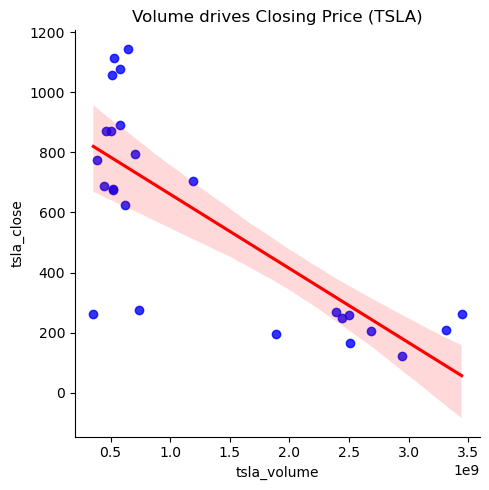


Reject the null hypothesis.

There is a significant linear correlation between tsla_volume and tsla_close.

p-value: 8.103655469770998e-06


In [5]:
# visual and stat test function 
e.explore_question_1(tsla_train)

## **Takeaway:**  

* ### There seems to be a correlation for the TSLA stock volume and close price. We can takeaway that even though there is a negative slope here there is still some correlation.

  --------------------

## Question 2

### Is there a significant relationship between the month in which TSLA stock was traded and its closing price?

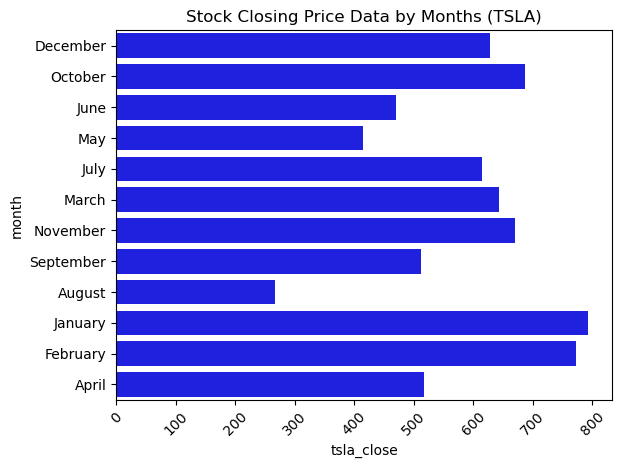

In [6]:
# visual and stat test function 
e.explore_question_2(tsla_train)

## **Takeaway:**  

* ### Here we can see over the 3 year span that the data shows winter being the season that has the highest closing price. we can take away that there is a relationship between these features and month may prove useful for predicting close_price. The data is normal, and less uniform unlike the other stocks companies

--------------------

## **Question 3**

### Does TSLA daily high stock price have a correlation with open stock price?

> **Null Hypothesis ($H0$):** There is **a significant correlation** between the high price and the open price of TSLA stock.  
>
> **Alternative Hypothesis ($Ha$):** There **is no significant correlation** between the high price and the open price of TSLA stock.

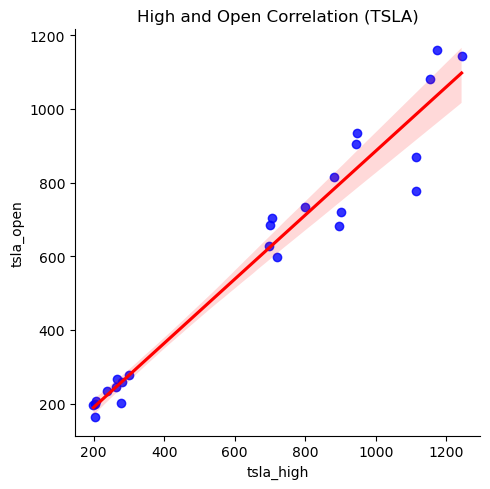


Reject the null hypothesis.

There is a significant linear correlation between tsla_high and tsla_open.

p-value: 1.1149549749719857e-16


In [7]:
# visual and stat test function 
e.explore_question_3(tsla_train)

## **Takeaway:**  

* ### We can see visually before running a stats test that these two features are very correlated so these will be super helpful in prediction.

-----------------

## Question 4

### Is there a significant correlation between the month in which TSLA stock was traded and its closing price?

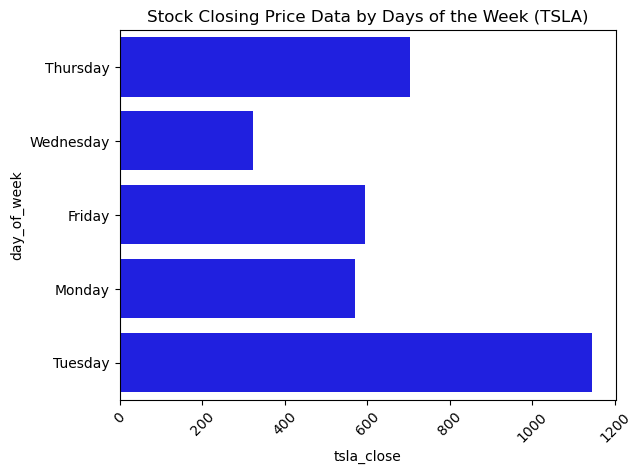

In [8]:
# visual and stat test function 
e.explore_question_4(tsla_train)

## **Takeaway:**  

* ### This visual can tell us that the data is very uniform, but we can discern the tiny differences of close price for each day which means its pretty average daily

# Explore Summary

- There is a strong relationship between date timeframes and features.
- There is a correlation between volume price and closing price.
    - The high price and open price had a strong correlation

# Features for modeling

### **Features that will be used:**
* *next_month_close*(target)  

### **Some features that may be useful:**  
* *tsla_open*
* *tsla_high*
* *tsla_low*
* *tsla_close*
* *tsla_volume*
* *year*

# Modeling

### Evaluation Metric
- The primary evaluation metrics for the models are:
  - Root Mean Squared Error (RMSE)
  - Calculated Model Significance

### Data Expansion
- Given more time, additional data could be gathered to improve model performance.
- Experimentation with hyperparameter configurations can lead to better significance and lower RMSE.

### Target Feature
- The target feature for the models is `next_month_close`.

### Baseline RMSE
- The baseline RMSE is approximately 0.34.

### Models and Hyperparameters
- Two different sets regression modeling for model development, each optimized for different features:
  1. RandomForestRegressor (default)
  3. LinearRegression (default)

### Model Evaluation
- Models will be developed and evaluated on the training and validation datasets.

### Final Model Selection
- The best-performing model, as determined by RMSE and Model Significance on the validation set, will be selected.

### Test Dataset
- The selected best model will be evaluated on the test dataset for final performance assessment.ized and easier to understand.


In [9]:
# Train, test split, and scale data
tsla_train, tsla_val, tsla_test = w.split_and_scale_data(tsla_df)

## Baseline Model Root Mean Squared Error | R2 Score

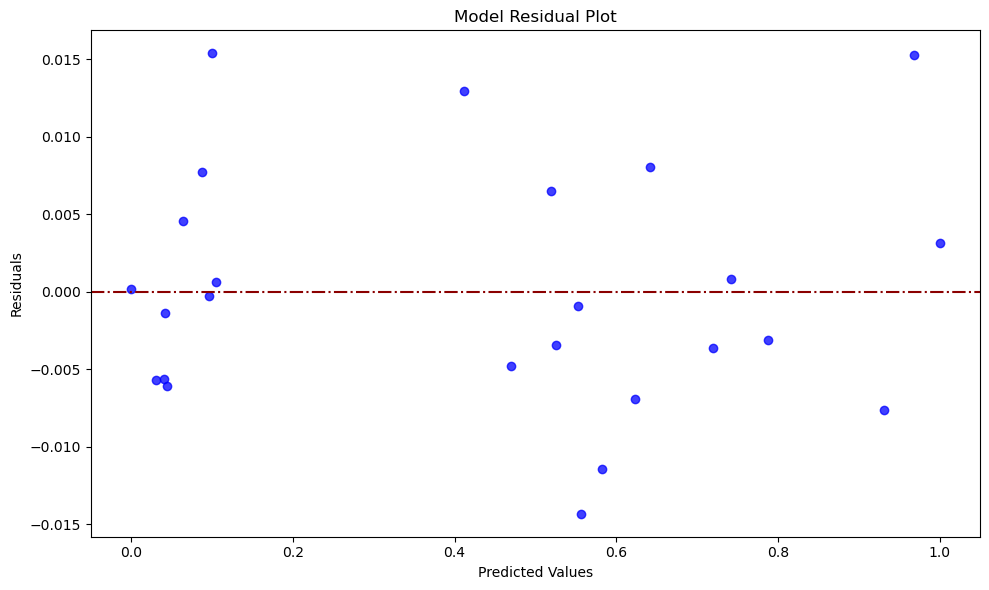


-------------------------------------
Model RMSE: 0.01
Model R-squared: 1.00

-------------------------------------
Baseline RMSE: 0.34
baseline R-squared: -0.08

-------------------------------------


In [10]:
# baseline and model rmse and residual plot visual
m.lin_reg_baseline_model(tsla_train, 'next_month_close')

## Best 3 models

In [11]:
# models testing function
m.main(tsla_train, tsla_val, tsla_test)


Model 1: Random Forest Regressor

-------------------------------------

Training RMSE: 0.02

-------------------------------------

Validation RMSE: 0.02

-------------------------------------

Training R-squared (R2): 0.99

-------------------------------------

Validation R-squared (R2): 1.00




Model 2: Linear Regression Baseline

Training Set Metrics:
RMSE: 0.01
R-squared: 1.00

Validation Set Metrics:
RMSE: 0.04
R-squared: 0.99




Model 3: XGBoost Regressor



-------------------------------------

Training RMSE: 0.01

-------------------------------------

Training R-squared (R2): 1.00

-------------------------------------

Validation RMSE: 0.03

-------------------------------------

Validation R-squared (R2): 0.99

-------------------------------------

Best Score: 0.0274834186348684




Best Model: Random Forest Regressor Model

-------------------------------------

Training RMSE: 0.03

-------------------------------------

Test RMSE: 0.07

-----------------------------

# Model Summary

### RandomForestRegression Model
- The RandomForestRegression model showed the best results in generalizing and performed best with the follwing metrics:
    - Test RMSE: 0.07
    - Test R-squared (R2): 0.92

### LinearRegression Model
- The LinearRegression model did great as well but was not performing like the Random Forest Regression model when validation metrics were compared.

### XGBRegressor Model
- The XGBRegressor model, with hyperparameter tuning, performed great but did not reach rfr performance.

# Conclusion

## Takeaways and Key Findings

- Company stocks with low volatility or are considered stable would not benefit from regression modeling.
- Company stocks with high volatility need to be analyzed over a shorter amount of time versus the span of twenty plus years.
- It's easier to analyze data when there is ups and downs on the stock you are trying to predict closing price.
- Tesla's stock is not easy to predict accurately and it goes the same for other volatile stocks explored during the exploration phase outside of the data science project.


## Model Improvement
- The model does well with default setting and hyperparameter tuning may or may not aid in regression modeling efforts.

# Recommendations and Next Steps

- I would recommend maybe gaining sentiment data, user data, and other forms of unstructured data that can be used with deep learning methodoligies may help in predicting certain pricing elements for high volatile company stocks. Additionally I would also detail time frames to adjust for open and closed time frames of the stock market for optimal opportunity in price predictions.

- Given more time, the following actions could be considered:
  - Gather more data to improve model performance.
  - Revisit the data exploration phase to gain a more comprehensive dataset.
      - Time Series Analysis would have been my alternate route in predicting closing prices:
          - Utilizing Time series models like:
          - ARIMA (AutoRegressive Integrated Moving Average)
          - or more advanced techniques like LSTM (Long Short-Term Memory) and FBProphet are designed specifically for time-dependent data like stock prices.